# Simulation of the James-Stein estimator

A figure from chapter 9 that illustrates the performance of the James-Stein estimator relative to the sample mean.

In [7]:
%matplotlib inline

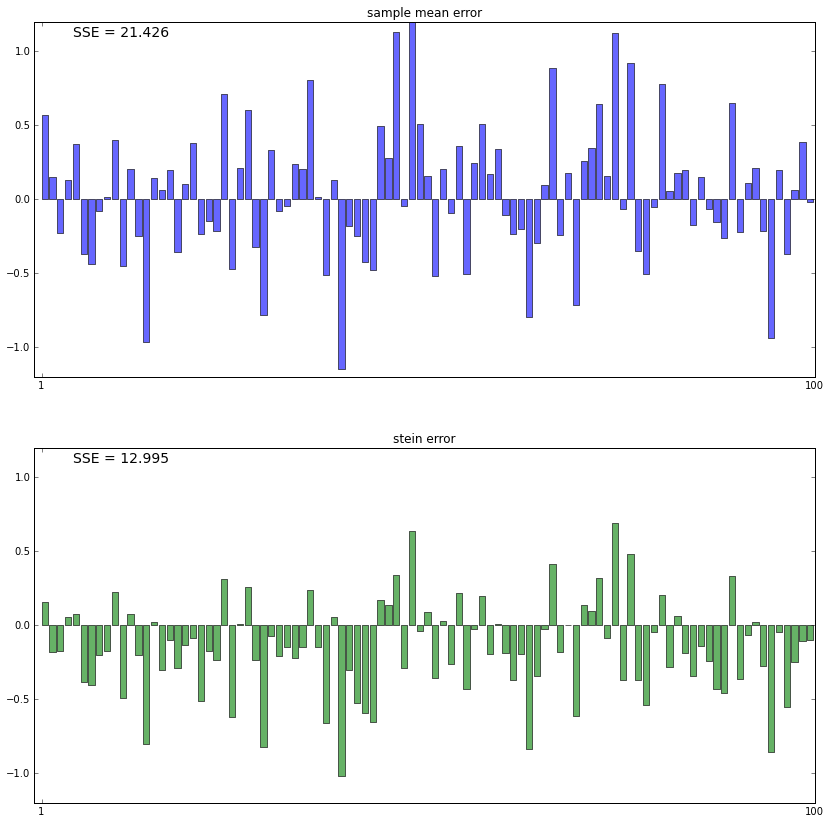

In [10]:

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt 

K = 100 # length of mu vector (number of agents)
N = 5  # number of observations per agent
sigma = 1

mu_vec = 1 * np.random.rand(K)  # k-th element is mu_k

Y = sigma * np.random.randn(N, K)  # k-th col is shocks for individual k

# Form the sample analog estimator
hat_mu_sap = np.empty(K)
for k in range(K):
    hat_mu_sap[k] = np.mean(mu_vec[k] + Y[:,k])

# Form the Stein estimator
t1 = (sigma**2) * (K - 2) / N
t2 = sum(hat_mu_sap * hat_mu_sap)
t3 = 1 - t1/t2
hat_mu_stein = t3 * hat_mu_sap 

# Errors
stein_error = hat_mu_stein - mu_vec
sap_error = hat_mu_sap - mu_vec

ss_sap = np.round(sum(sap_error * sap_error), decimals=3)
ss_stein = np.round(sum(stein_error * stein_error), decimals=3)

fig, axes =plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ymin, ymax = -1.2, 1.2

for ax in axes:
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0, K)
    ax.set_xticks((1, K))

ax = axes[0]
ax.set_title('sample mean error')
ax.bar(range(1, K+1), sap_error, alpha=0.6)
ax.text(5, 1.10, 'SSE = {}'.format(ss_sap), fontsize=14)
ax.legend()

ax = axes[1]
ax.set_title('stein error')
ax.bar(range(1, K+1), stein_error, color='g', alpha=0.6)
ax.text(5, 1.10, 'SSE = {}'.format(ss_stein), fontsize=14)


plt.show()


